In [4]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import datetime as dtm
import vel_tools as vt

from salishsea_tools import nc_tools, viz_tools

%matplotlib inline
mpl.rcParams.update({'font.size': 12})
mpl.rcParams["axes.formatter.useoffset"] = False

warnings.simplefilter("ignore")

In [5]:
def make_plots(datein, t=[0], zlevel=[0], ylocn=455, section_slice=np.arange(238, 318),
               map_bounds=np.array([-124, -123, 48.5, 49.7])):
    '''Plot nowcast and nowcast-green velocity fields
    '''
    
    # Plotting parameters
    versions = np.array([3.4, 3.6])
    
    # ----- LOAD WIND FORCING -----
    wind_OP, wind_RS = vt.load_wind(datein)
    lat_wind = wind_OP.variables['nav_lat']
    lon_wind = wind_OP.variables['nav_lon']
    u_wind   = wind_OP.variables['u_wind']
    v_wind   = wind_OP.variables['v_wind']
    
    # Make figure
    fig, ax = plt.subplots(2, 2, figsize=(15, 20))
    
    for i, version in enumerate(versions):
        
        # ----- LOAD NEMO RESULTS -----
        u_vel, v_vel, w_vel, tracers = vt.load_NEMO_OP(datein, version=version, avg='h')
        
        # Define subfields
        ugrid     = u_vel.variables['vozocrtx']
        vgrid     = v_vel.variables['vomecrty']
        zlevels   = u_vel.variables['depthu']
        lats      = u_vel.variables['nav_lat']
        lons      = u_vel.variables['nav_lon']
        tindex    = u_vel.variables['time_counter']
        timestamp = nc_tools.timestamp(u_vel, t, version=version)
        
        # ----- PLOT SURFACE CURRENTS -----
        vt.plot_horz_currents(ax[0, i], lons, lats, ugrid, vgrid, t=t, zlevel=zlevel)
        vt.plot_wind(ax[0, i], lon_wind, lat_wind, u_wind, v_wind, t=t)
        ax[0, i].plot(lons[ylocn, section_slice], lats[ylocn, section_slice],
                      linestyle='solid', linewidth=3, color='black', label='Section Line')
        ax[0, i].set_xlim(map_bounds[0:2])
        ax[0, i].set_ylim(map_bounds[2:4])
        ax[0, i].set_title('NEMO {version:.1f}, {date}'.format(
                version=version, date=timestamp.format('DD-MMM-YYYY HH:MM')))
        
        # ----- PLOT ALONGSHORE CURRENTS -----
        mesh = vt.plot_cross_section(ax[1, i], lons, vgrid, zlevels, ylocn, section_slice, t=t,
                                     crange=np.array([-0.1, 0.1]))
        ax[1, i].set_xticks(np.arange(-123.6, -123.2, 0.1))
        cbar = fig.colorbar(mesh, ax=ax[1, i], orientation='horizontal')
        cbar.set_ticks(np.arange(-.1, .101, .05))
        cbar.set_label('v Velocity [{.units}]'.format(vgrid))
        ax[1, i].set_ylim(450, 0)
        ax[1, i].set_title('NEMO {version:.1f}, {date}'.format(version=version, date=timestamp.format('DD-MMM-YYYY HH:MM')))
        

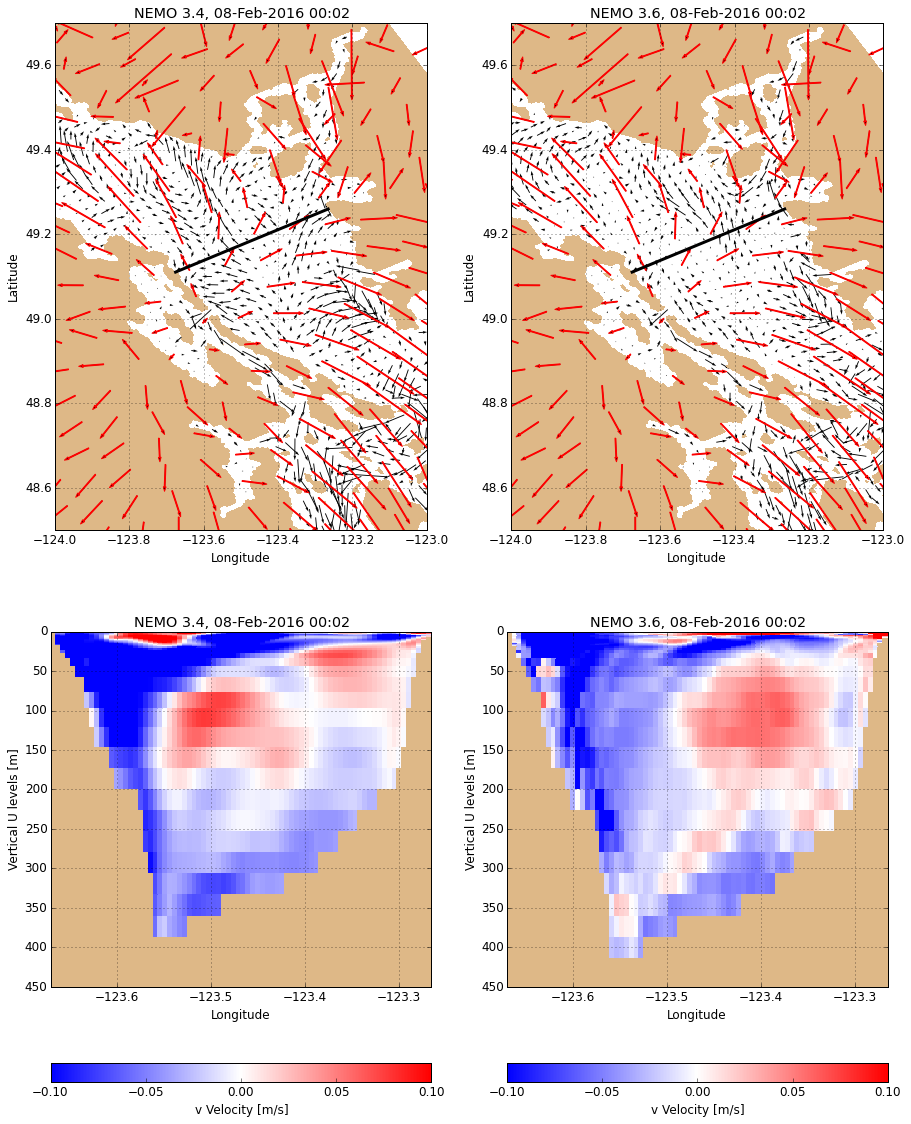

In [7]:
# Plotting parameters
# ------ T = 0 ----------
t             = [0]
zlevel        = [0]
ylocn         = 455
section_slice = np.arange(238, 318)
map_bounds    = np.array([-124, -123, 48.5, 49.7])

# Make Plots
make_plots('2016-feb-08', t=t, zlevel=zlevel, ylocn=ylocn, section_slice=section_slice, map_bounds=map_bounds)

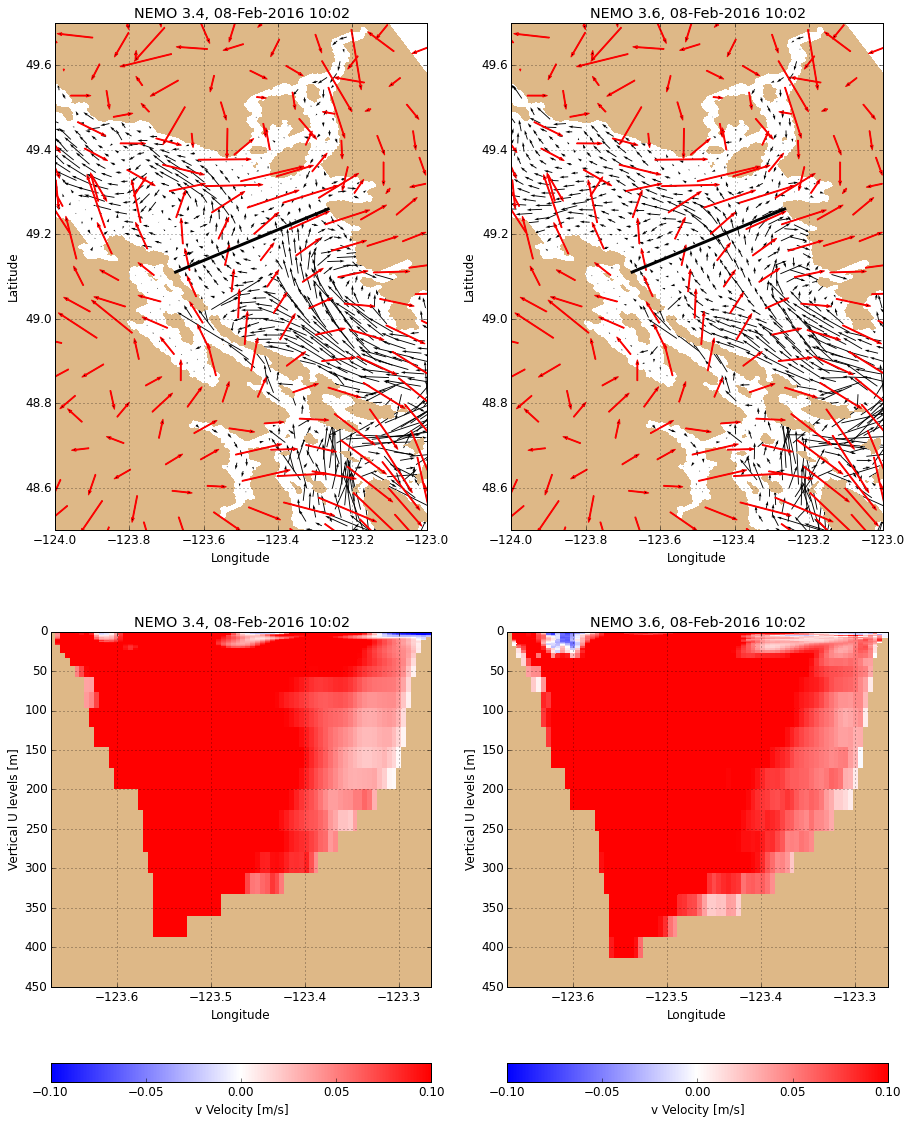

In [8]:
# Plotting parameters
# ------ T = 0 ----------
t             = [10]
zlevel        = [0]
ylocn         = 455
section_slice = np.arange(238, 318)
map_bounds    = np.array([-124, -123, 48.5, 49.7])

# Make Plots
make_plots('2016-feb-08', t=t, zlevel=zlevel, ylocn=ylocn, section_slice=section_slice, map_bounds=map_bounds)